In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
sns.set(style='darkgrid')


rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
emart = pd.read_excel("../../데이터/emart(최종.ver1).xlsx")
emart

,지점명,주소,3km내 이마트,3km내 경쟁 대형마트,3km내 창고형 마트,부지 면적,부지 공시지가,주차 시설,대중 교통,2020실제영업이익(백만원),...,총인구수,경제활동인구,1인당지방세부담액(천원),소멸위기지역,1인가구구성원수,다인가구구성원수,인스타,블로그(1년),카페(1년),점포형태
0,청계천점,대한민국 서울특별시 중구 황학동 청계천로 400,1,3,0,96410.82,861912730800,1000,0,2864.374860,...,126120,79077.240,10088.84,0,20803,105317,1288,441,323,0
1,용산점,대한민국 서울특별시 용산구 한강로3가 한강대로23길 55,1,0,0,42405.64,641173276800,2100,2,1259.875698,...,229393,143829.411,3261.61,0,34240,195153,696,264,85,0
2,창동점,대한민국 서울특별시 도봉구 창동 노해로65길 4,1,4,0,12776.00,90530736000,159,1,2518.917716,...,330149,207003.423,539.75,0,30848,299301,162,314,217,0
3,미아점,대한민국 서울특별시 성북구 길음동 도봉로 17,2,2,0,20690.71,316154048800,195,1,1735.196529,...,442148,277226.796,779.74,0,55136,387012,561,924,162,0
4,하월곡점,대한민국 서울특별시 성북구 하월곡동 230,2,2,0,75041.00,479511990000,760,0,2229.475424,...,442148,277226.796,779.74,0,55136,387012,1162,207,166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,시지점,대구광역시 수성구 고산로 101 (신매동 566-3),1,2,0,42302.00,162058962000,984,0,1053.171844,...,427436,250477.496,1098.98,0,35853,391583,35,12,1,2
161,부평점,인천광역시 부평구 주부토로 241 (갈산동 171),1,8,0,6600.00,12566400000,543,0,209.458233,...,503946,326557.008,149.36,0,48607,455339,151,136,10,2
162,덕이점,고양시 일산서구 경의로 798 (덕이동 205),2,2,1,31948.83,73642053150,676,0,1054.340529,...,303555,192453.870,1198.70,0,84595,991584,1268,122,12,2
163,서부산점,부산광역시 사상구 낙동대로 910 (감전동),1,2,0,71773.50,133929351000,984,0,1869.793588,...,216083,124679.891,769.06,0,27709,188374,43,53,32,2


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=emart.iloc[:,2:-1]

In [15]:
X

,3km내 이마트,3km내 경쟁 대형마트,3km내 창고형 마트,부지 면적,부지 공시지가,주차 시설,대중 교통,2020실제영업이익(백만원),65세이상,65세이상경제활동인구,총인구수,경제활동인구,1인당지방세부담액(천원),소멸위기지역,1인가구구성원수,다인가구구성원수,인스타,블로그(1년),카페(1년)
0,1,3,0,96410.82,861912730800,1000,0,2864.374860,23620,6873.420,126120,79077.240,10088.84,0,20803,105317,1288,441,323
1,1,0,0,42405.64,641173276800,2100,2,1259.875698,39123,11384.793,229393,143829.411,3261.61,0,34240,195153,696,264,85
2,1,4,0,12776.00,90530736000,159,1,2518.917716,60530,17614.230,330149,207003.423,539.75,0,30848,299301,162,314,217
3,2,2,0,20690.71,316154048800,195,1,1735.196529,72510,21100.410,442148,277226.796,779.74,0,55136,387012,561,924,162
4,2,2,0,75041.00,479511990000,760,0,2229.475424,72510,21100.410,442148,277226.796,779.74,0,55136,387012,1162,207,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,2,0,42302.00,162058962000,984,0,1053.171844,65173,18900.170,427436,250477.496,1098.98,0,35853,391583,35,12,1
161,1,8,0,6600.00,12566400000,543,0,209.458233,71494,23092.562,503946,326557.008,149.36,0,48607,455339,151,136,10
162,2,2,1,31948.83,73642053150,676,0,1054.340529,36704,9946.784,303555,192453.870,1198.70,0,84595,991584,1268,122,12
163,1,2,0,71773.50,133929351000,984,0,1869.793588,37716,10749.060,216083,124679.891,769.06,0,27709,188374,43,53,32


In [16]:
y = emart.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LR  = LogisticRegression()

In [20]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
LR.score(X_test,y_test)

0.9047619047619048

In [22]:
LR.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cro_val = cross_val_score(LR,X,y, cv=10)
cro_val.mean()

0.8367647058823529

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_train, LR.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       100
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         7

    accuracy                           0.81       123
   macro avg       0.27      0.33      0.30       123
weighted avg       0.66      0.81      0.73       123



In [27]:
print(confusion_matrix(y_train, LR.predict(X_train)))

[[100   0   0]
 [ 16   0   0]
 [  7   0   0]]


# 다 0이라는 문제를 해결하기 위해 정규화를 해보자

In [28]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale 

In [29]:
data1 =emart.iloc[:,2:-1]
data1= np.array(data1)
data2 = scale(data1)
data3 = robust_scale(data1)
data4 = minmax_scale(data1)

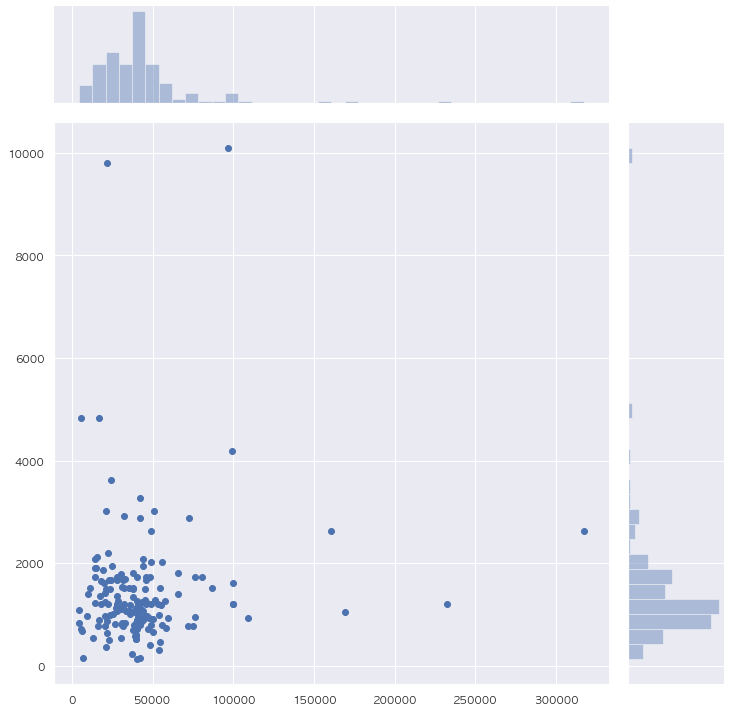

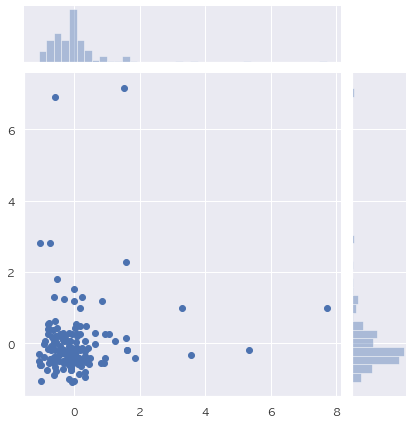

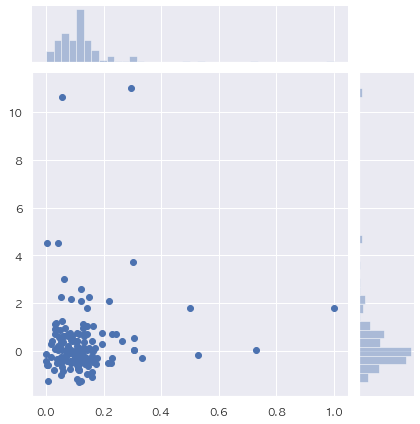

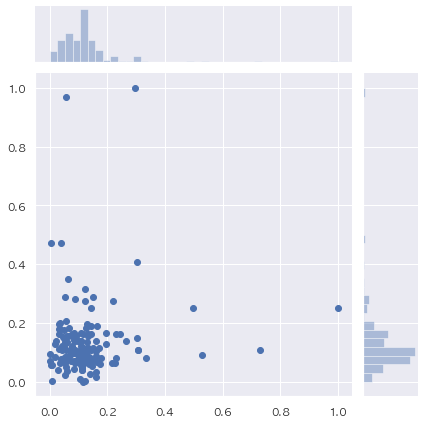

In [30]:
sns.jointplot(data1[:,3],data1[:,12],height=10)
plt.show()
sns.jointplot(data2[:,3],data2[:,12])
plt.show()
sns.jointplot(data4[:,3],data3[:,12])
plt.show()
sns.jointplot(data4[:,3],data4[:,12])
plt.show()

In [31]:
# X = data2
X = data3
# X = data4
y = emart.iloc[:,-1]

In [32]:
LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
cro_val = cross_val_score(LR,X,y,cv=10)

In [34]:
cro_val.mean()

0.8786764705882353

In [36]:
np.round(LR.predict_proba(X),2)

array([[0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.83, 0.12, 0.05],
       [0.99, 0.01, 0.  ],
       [0.81, 0.03, 0.16],
       [0.97, 0.03, 0.  ],
       [0.97, 0.  , 0.03],
       [0.91, 0.04, 0.05],
       [0.47, 0.53, 0.  ],
       [0.83, 0.05, 0.12],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.  , 0.01],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.01, 0.03],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.93, 0.03, 0.04],
       [0.92, 0.02, 0.06],
       [0.93, 0.02, 0.05],
       [0.99, 0.01, 0.  ],
       [0.99, 0.  , 0.01],
       [0.89, 0.11, 0.  ],
       [0.88, 0.02, 0.1 ],
       [0.94, 0.06, 0.  ],
       [0.92, 0.07, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.8 , 0.15, 0.05],
       [0.79, 0.12, 0.09],
       [0.8 , 0.2 , 0.  ],
       [0.8 , 0.2 , 0.  ],
 

In [37]:
LR.coef_

array([[-1.09916103, -0.3898876 ,  0.6438859 , -1.13664473,  1.2256191 ,
         0.18579776,  0.15633607, -0.06152643, -0.23979511,  0.49195086,
        -0.11755017,  0.0565574 ,  0.17939302,  0.02529599,  0.0963428 ,
        -0.25254851,  0.60514811,  0.3739615 , -0.06424264],
       [-0.31243262,  0.13955119, -0.56143207,  1.01382017, -0.77193687,
        -0.0203914 ,  0.83511258,  0.00816785,  0.09534303, -0.32198135,
        -0.08114661, -0.1478647 ,  0.24348294, -0.0036338 , -0.15358352,
         0.21436523, -0.11578207,  0.51129161,  1.0559984 ],
       [ 1.41159365,  0.25033641, -0.08245383,  0.12282456, -0.45368222,
        -0.16540636, -0.99144865,  0.05335858,  0.14445208, -0.16996952,
         0.19869677,  0.0913073 , -0.42287596, -0.02166219,  0.05724072,
         0.03818328, -0.48936604, -0.88525311, -0.99175576]])

In [38]:
print(np.array(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


In [39]:
print(confusion_matrix(y, LR.predict(X)))

[[137   1   0]
 [  9   9   0]
 [  1   0   8]]


In [40]:
print(classification_report(y, LR.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       138
           1       0.90      0.50      0.64        18
           2       1.00      0.89      0.94         9

    accuracy                           0.93       165
   macro avg       0.94      0.79      0.85       165
weighted avg       0.93      0.93      0.93       165



In [41]:
data2 = scale(data1)

In [42]:
X = data2
y = emart.iloc[:,-1]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [45]:
train_accuracy = []
test_accuracy = []
neighbors = range(3,11,2)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
k = test_accuracy.index(max(test_accuracy)) + 3

In [46]:
KNN = KNeighborsClassifier(k)

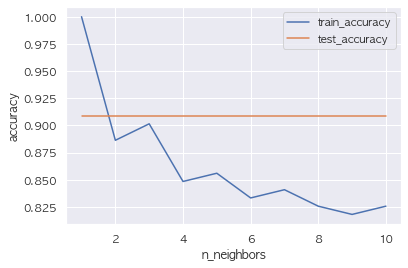

In [47]:
import matplotlib.pyplot as plt
#딱 맞는 k함수를 찾아 주는 함수
train_accuracy = []
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors,train_accuracy, label="train_accuracy")
plt.plot(neighbors,test_accuracy, label="test_accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [48]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
KNN.predict_proba(X)

array([[0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [51]:
SVM = svm.SVC(probability=True)

In [52]:
SVM.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
np.round(SVM.predict_proba(X),3)

array([[0.899, 0.085, 0.017],
       [0.913, 0.085, 0.002],
       [0.889, 0.083, 0.028],
       [0.912, 0.085, 0.003],
       [0.887, 0.079, 0.034],
       [0.91 , 0.085, 0.005],
       [0.89 , 0.084, 0.026],
       [0.908, 0.083, 0.009],
       [0.9  , 0.085, 0.016],
       [0.871, 0.074, 0.056],
       [0.925, 0.07 , 0.005],
       [0.912, 0.085, 0.002],
       [0.939, 0.059, 0.001],
       [0.926, 0.044, 0.03 ],
       [0.929, 0.067, 0.004],
       [0.914, 0.085, 0.001],
       [0.905, 0.084, 0.011],
       [0.936, 0.053, 0.012],
       [0.914, 0.085, 0.001],
       [0.942, 0.051, 0.007],
       [0.933, 0.034, 0.033],
       [0.924, 0.05 , 0.027],
       [0.903, 0.085, 0.012],
       [0.918, 0.049, 0.034],
       [0.898, 0.085, 0.017],
       [0.917, 0.047, 0.035],
       [0.914, 0.085, 0.001],
       [0.92 , 0.045, 0.036],
       [0.913, 0.085, 0.002],
       [0.922, 0.042, 0.036],
       [0.905, 0.077, 0.018],
       [0.912, 0.085, 0.003],
       [0.912, 0.085, 0.003],
       [0.

In [64]:
cro_val_LR = cross_val_score(LR,X,y,cv=10)
cro_val_KNN = cross_val_score(KNN,X,y,cv=10)
cro_val_SVM = cross_val_score(SVM,X,y,cv=10)

In [65]:
cro_val_LR.mean()

0.8669117647058823

In [66]:
cro_val_KNN.mean(),k

(0.8610294117647058, 3)

In [67]:
cro_val_SVM.mean()

0.8367647058823529

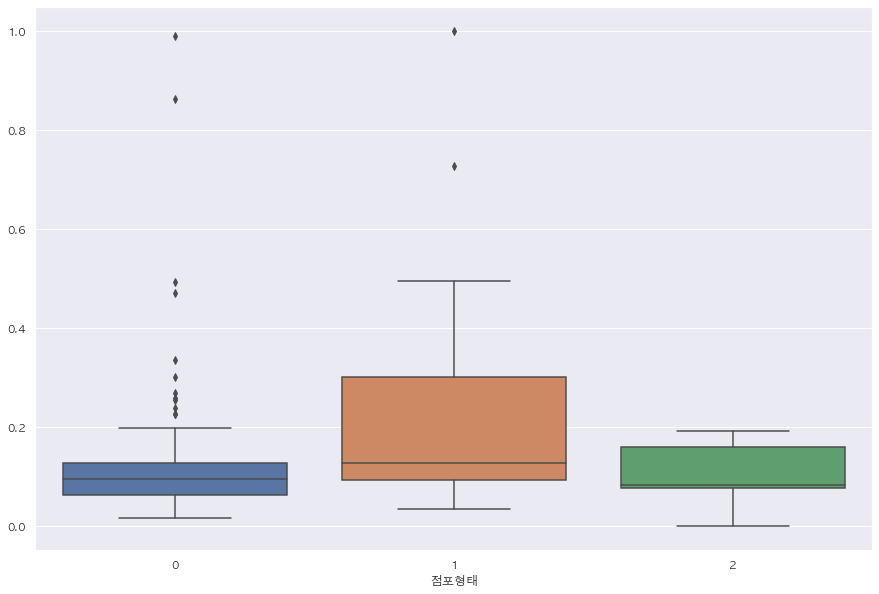

In [68]:
#매출 outlier
plt.figure(figsize=(15,10))
sns.boxplot(x=y,y=data4[:,7])